In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = pd.read_excel("datafile.xls")

In [0]:
data = np.array(df)

In [0]:
data

array([['Andaman & Nicobar Islands', 1901, 49.2, ..., 560.3, 1696.3,
        980.3],
       ['Andaman & Nicobar Islands', 1902, 0.0, ..., 458.3, 2185.9,
        716.7],
       ['Andaman & Nicobar Islands', 1903, 12.7, ..., 236.1, 1874.0,
        690.6],
       ...,
       ['Lakshadweep', 2015, 2.2, ..., 223.9, 860.9, 555.4],
       ['Lakshadweep', 2016, 59.6, ..., 83.2, 745.4, 165.4],
       ['Lakshadweep', 2017, 21.3, ..., 247.8, 1108.3, 360.7]],
      dtype=object)

In [0]:
train = data[211:328,2:14]

In [0]:
train 

array([[27.1, 19.5, 30.6, ..., 163.7, 115.6, 1.2],
       [9.3, 10.2, 105.6, ..., 97.0, 7.8, 1.3],
       [19.9, 25.4, 103.6, ..., 159.5, 59.3, 1.3],
       ...,
       [13.4, 15.5, 37.5, ..., 62.6, 14.0, 15.2],
       [18.9, 15.9, 64.1, ..., 136.5, 38.2, 7.4],
       [1.7, 37.8, 116.7, ..., 212.1, 10.3, 11.0]], dtype=object)

In [0]:
train1 = np.reshape(train , (117*12,1))

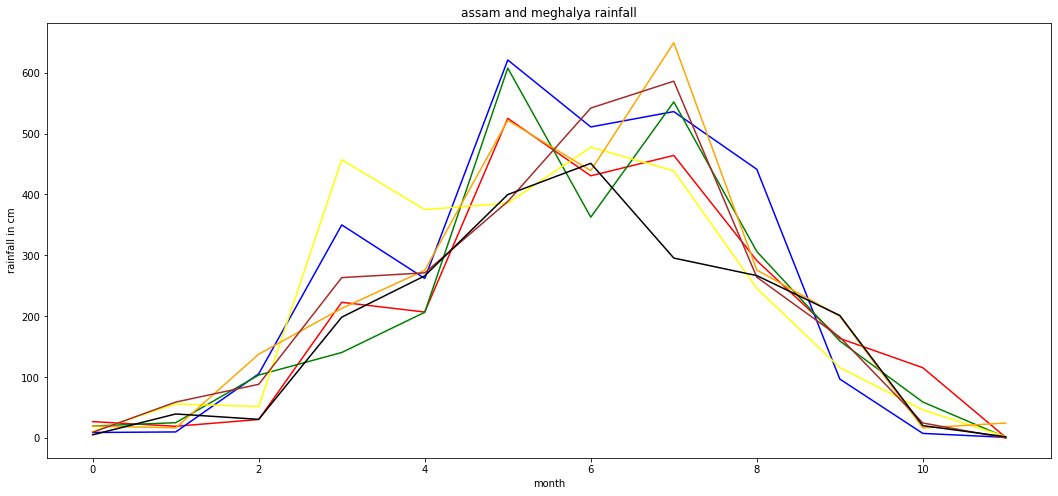

In [0]:
plt.rcParams["figure.figsize"] = (18,8)
plt.title('assam and meghalya rainfall')
plt.ylabel('rainfall in cm')
plt.xlabel('month')
plt.plot(train1[:12] , color="red")
plt.plot(train1[12:24] , color="blue")
plt.plot(train1[24:36] , color="green")
plt.plot(train1[36:48] , color="yellow")
plt.plot(train1[48:60] , color="orange")
plt.plot(train1[60:72] , color="brown")
plt.plot(train1[1200:1212] , color="black")
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_scaled=sc.fit_transform(train1)

In [0]:
train_scaled

array([[0.02723071],
       [0.01959405],
       [0.03074759],
       ...,
       [0.21312299],
       [0.01034968],
       [0.01105305]])

In [0]:
train_scaled.shape

(1404, 1)

In [0]:
xtrain = train_scaled[:1200]
xtest = train_scaled[1200:]

In [0]:
X_train = []
y_train = []
for i in range(60, len(xtrain)):
    X_train.append(xtrain[i-60:i, 0])
    y_train.append(xtrain[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train.shape

(1140, 60)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1140/1140 [==============================] - 11s 10ms/step - loss: 0.0448
Epoch 2/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0409
Epoch 3/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0344
Epoch 4/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0123
Epoch 5/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0102
Epoch 6/10
1140/1140 [==============================] - 7s 7ms/step - loss: 0.0096
Epoch 7/10
1140/1140 [==============================] - 7s 7ms/step - loss: 0.0087
Epoch 8/10
1140/1140 [==============================] - 7s 7ms/step - loss: 0.0083
Epoch 9/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0090
Epoch 10/10
1140/1140 [==============================] - 7s 7ms/step - loss: 0.0083


In [0]:
X_test = []
y_test = []
for i in range(60, len(xtest)):
    X_test.append(xtest[i-60:i, 0])
    y_test.append(xtest[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [0]:
X_test.shape

(144, 60)

In [0]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
predicted_rainfall = regressor.predict(X_test)

In [0]:
predicted_rainfall.shape

(144, 1)

In [0]:
prediction1 = sc.inverse_transform(predicted_rainfall)

In [0]:
cc = xtest[60:]
cc= sc.inverse_transform(cc)

In [0]:
prediction1.shape

(144, 1)

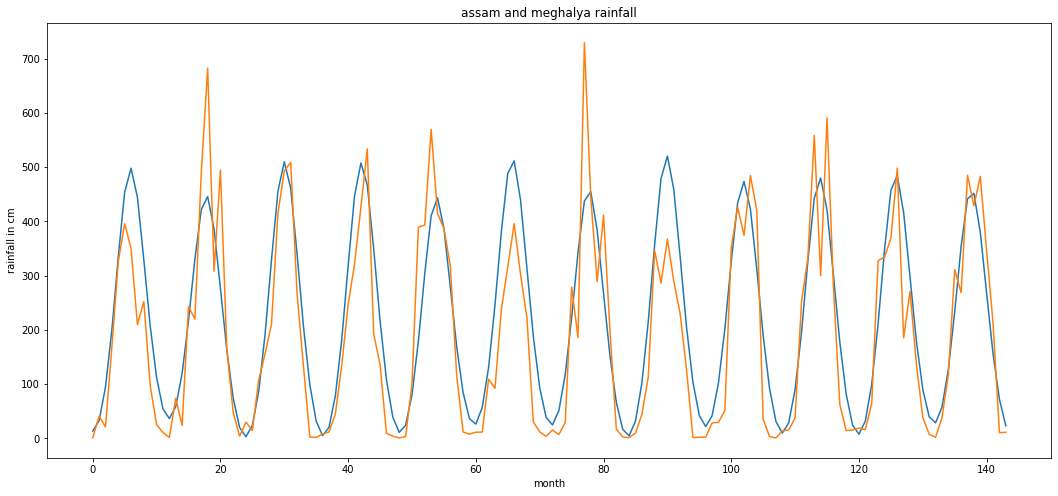

In [0]:
plt.rcParams["figure.figsize"] = (18,8)
plt.title('assam and meghalya rainfall')
plt.ylabel('rainfall in cm')
plt.xlabel('month')
plt.plot(prediction1)
plt.plot(cc)
plt.show()

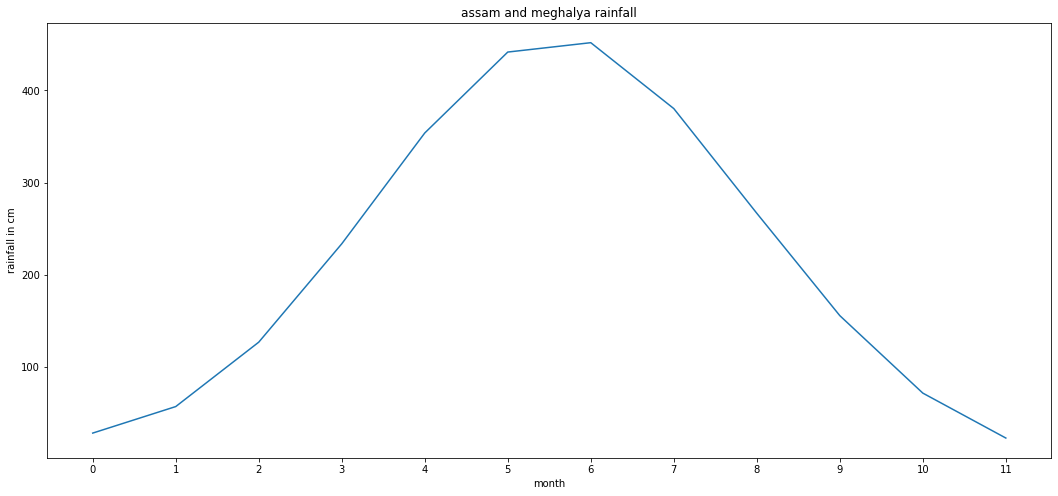

In [0]:
plt.rcParams["figure.figsize"] = (18,8)
plt.title('assam and meghalya rainfall')
plt.ylabel('rainfall in cm')
plt.xlabel('month')
plt.plot(prediction1[-12:])
plt.xticks(np.arange(0, 12, 1)) 
plt.show()

In [0]:
prediction1[-12:]

array([[ 28.478006],
       [ 57.22861 ],
       [127.04979 ],
       [233.70311 ],
       [353.8456  ],
       [441.58432 ],
       [451.74084 ],
       [380.3019  ],
       [266.80325 ],
       [155.819   ],
       [ 71.82261 ],
       [ 23.113653]], dtype=float32)

In [0]:
train2 = data[1381:1498,2:14]

In [0]:
train2

array([[35.4, 28.9, 11.1, ..., 2.0, 0.0, 6.1],
       [0.0, 0.7, 2.9, ..., 9.3, 0.0, 0.0],
       [14.7, 0.5, 2.3, ..., 4.0, 0.0, 2.3],
       ...,
       [12.4, 6.6, 71.8, ..., 3.7, 2.3, 0.2],
       [0.0, 1.1, 20.7, ..., 5.2, 0.0, 1.0],
       [34.2, 0.3, 7.2, ..., 0.0, 1.8, 4.2]], dtype=object)

In [0]:
train2 = np.reshape(train2 , (117*12,1))

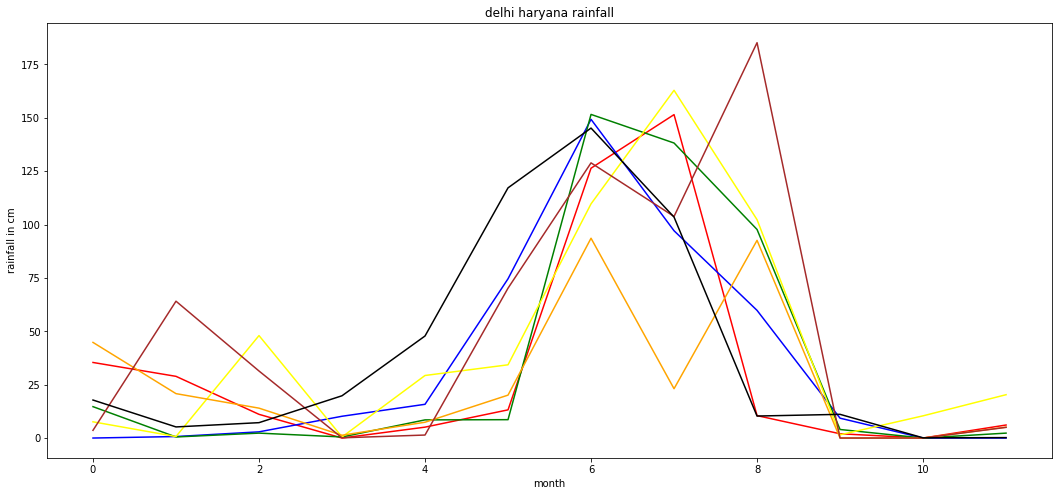

In [0]:
plt.rcParams["figure.figsize"] = (18,8)
plt.title('delhi haryana rainfall')
plt.ylabel('rainfall in cm')
plt.xlabel('month')
plt.plot(train2[:12] , color="red")
plt.plot(train2[12:24] , color="blue")
plt.plot(train2[24:36] , color="green")
plt.plot(train2[36:48] , color="yellow")
plt.plot(train2[48:60] , color="orange")
plt.plot(train2[60:72] , color="brown")
plt.plot(train2[1200:1212] , color="black")
plt.show()

In [0]:
train_scaled2=sc.fit_transform(train2)

In [0]:
xtrain2 = train_scaled2[:1200]
xtest2 = train_scaled2[1200:]

In [0]:
X_train2 = []
y_train2 = []
for i in range(60, len(xtrain2)):
    X_train2.append(xtrain2[i-60:i, 0])
    y_train2.append(xtrain2[i, 0])
X_train2, y_train2 = np.array(X_train2), np.array(y_train2)

In [0]:
X_train2.shape

(1140, 60)

In [0]:
X_train2 = np.reshape(X_train2, (X_train2.shape[0], X_train2.shape[1], 1))

In [0]:
regressor.fit(X_train2, y_train2, epochs = 10, batch_size = 32)

Epoch 1/10
1140/1140 [==============================] - 7s 7ms/step - loss: 0.0204
Epoch 2/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0168
Epoch 3/10
1140/1140 [==============================] - 7s 7ms/step - loss: 0.0161
Epoch 4/10
1140/1140 [==============================] - 8s 7ms/step - loss: 0.0158
Epoch 5/10
1140/1140 [==============================] - 8s 7ms/step - loss: 0.0155
Epoch 6/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0144
Epoch 7/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0130
Epoch 8/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0131
Epoch 9/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0145
Epoch 10/10
1140/1140 [==============================] - 7s 7ms/step - loss: 0.0132


In [0]:
X_test2 = []
y_test2 = []
for i in range(60, len(xtest2)):
    X_test2.append(xtest2[i-60:i, 0])
    y_test2.append(xtest2[i, 0])
X_test2, y_test2 = np.array(X_test2), np.array(y_test2)

In [0]:
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1))

In [0]:
predicted_rainfall2 = regressor.predict(X_test2)

In [0]:
prediction2 = sc.inverse_transform(predicted_rainfall2)


In [0]:
cc2 = xtest2[60:]
cc2= sc.inverse_transform(cc2)

In [0]:
prediction2.shape

(144, 1)

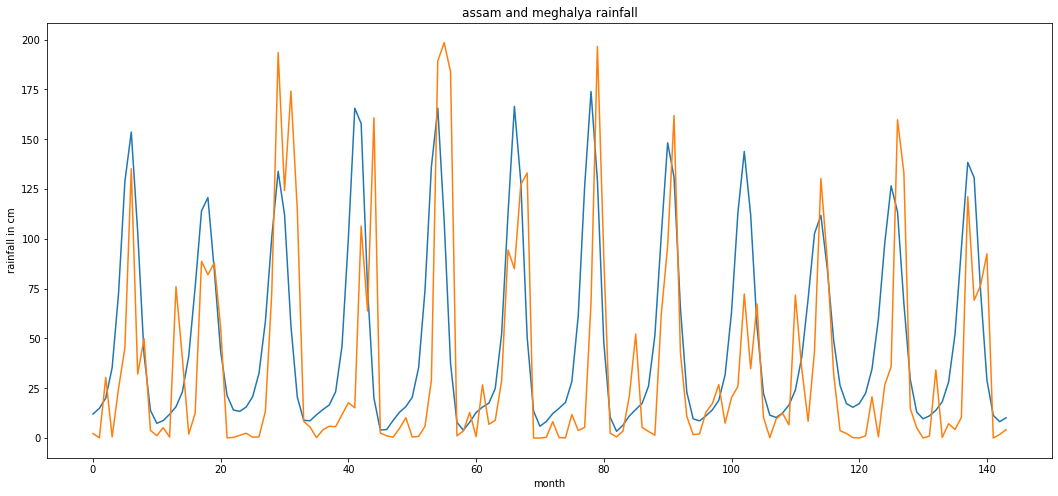

In [0]:
plt.rcParams["figure.figsize"] = (18,8)
plt.title('assam and meghalya rainfall')
plt.ylabel('rainfall in cm')
plt.xlabel('month')
plt.plot(prediction2)
plt.plot(cc2)
plt.show()

In [0]:
prediction2[-12:]

array([[ 13.900053],
       [ 18.173828],
       [ 28.117666],
       [ 52.00302 ],
       [ 95.32397 ],
       [138.39247 ],
       [130.73962 ],
       [ 74.205284],
       [ 29.110159],
       [ 11.358753],
       [  8.198937],
       [ 10.157486]], dtype=float32)

In [0]:
train3 = data[679:796,2:14]

In [0]:
train3 = np.reshape(train2 , (117*12,1))

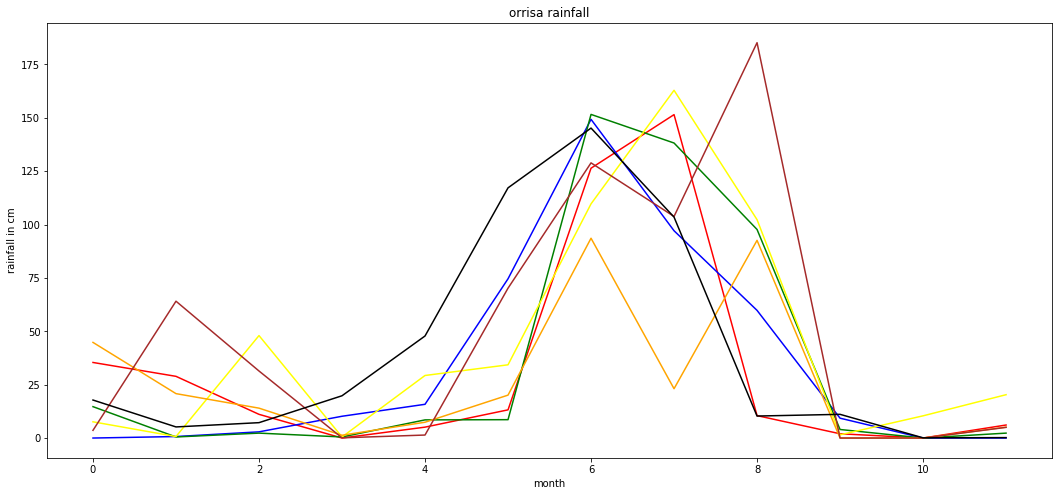

In [0]:
plt.rcParams["figure.figsize"] = (18,8)
plt.title('orrisa rainfall')
plt.ylabel('rainfall in cm')
plt.xlabel('month')
plt.plot(train3[:12] , color="red")
plt.plot(train3[12:24] , color="blue")
plt.plot(train3[24:36] , color="green")
plt.plot(train3[36:48] , color="yellow")
plt.plot(train3[48:60] , color="orange")
plt.plot(train3[60:72] , color="brown")
plt.plot(train3[1200:1212] , color="black")
plt.show()

In [0]:
train_scaled3=sc.fit_transform(train3)

In [0]:
xtrain3 = train_scaled3[:1200]
xtest3 = train_scaled3[1200:]

In [0]:
X_train3 = []
y_train3 = []
for i in range(60, len(xtrain3)):
    X_train3.append(xtrain3[i-60:i, 0])
    y_train3.append(xtrain3[i, 0])
X_train3, y_train3 = np.array(X_train3), np.array(y_train3)

In [0]:
X_train3.shape

(1140, 60)

In [0]:
X_train3 = np.reshape(X_train3, (X_train3.shape[0], X_train3.shape[1], 1))

In [0]:
regressor.fit(X_train3, y_train3, epochs = 10, batch_size = 32)

Epoch 1/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0129
Epoch 2/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0141
Epoch 3/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0133
Epoch 4/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0130
Epoch 5/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0136
Epoch 6/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0131
Epoch 7/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0125
Epoch 8/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0128
Epoch 9/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0126
Epoch 10/10
1140/1140 [==============================] - 7s 6ms/step - loss: 0.0134


In [0]:
X_test3 = []
y_test3 = []
for i in range(60, len(xtest3)):
    X_test3.append(xtest3[i-60:i, 0])
    y_test3.append(xtest3[i, 0])
X_test3, y_test3 = np.array(X_test3), np.array(y_test3)

In [0]:
X_test3 = np.reshape(X_test3, (X_test3.shape[0], X_test3.shape[1], 1))

In [0]:
predicted_rainfall3 = regressor.predict(X_test3)

In [0]:
prediction3 = sc.inverse_transform(predicted_rainfall3)

In [0]:
cc3 = xtest3[60:]
cc3= sc.inverse_transform(cc3)

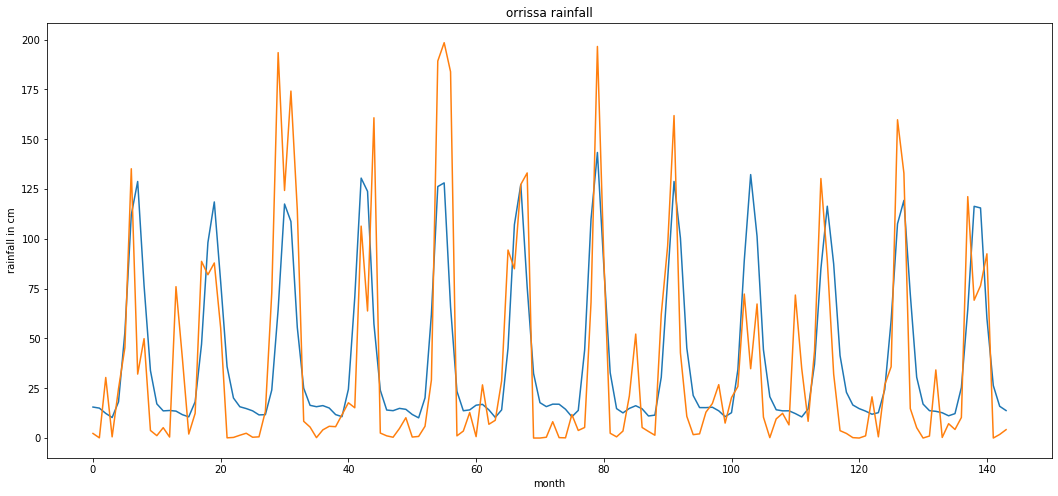

In [0]:
plt.rcParams["figure.figsize"] = (18,8)
plt.title('orrissa rainfall')
plt.ylabel('rainfall in cm')
plt.xlabel('month')
plt.plot(prediction3)
plt.plot(cc3)
plt.show()